In [73]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 2 a)

Implement a program that will display the color image “blaklokke.jpg” (can
downloaded from Canvas) together with its RGB-components (in gray scale)
in a 2 × 2 panel

## Solution

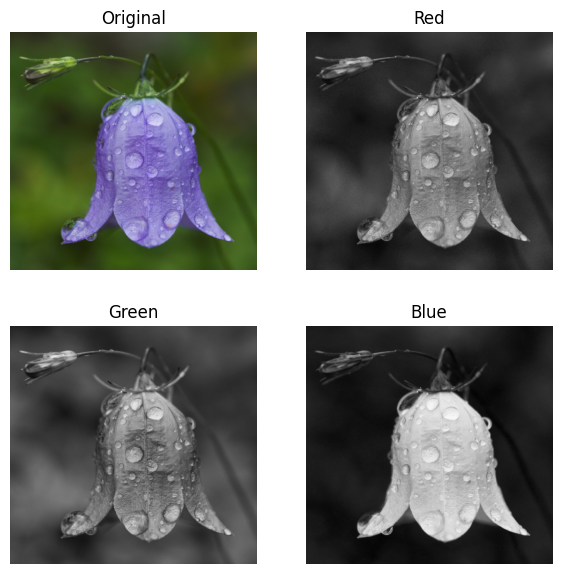

In [74]:
# Load image and convert to floats
img = np.array(Image.open("blaklokke.jpg")) / 255

# Select the channels
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

images = [img, R, G, B]
names = ["Original", "Red", "Green", "Blue"]

## Create subplots and plot the color image
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(7,7))
for ax, im, name in zip(axes.ravel(), images, names):
    ax.imshow(im, cmap="gray") if ax != axes[0,0] else ax.imshow(im)
    ax.set_title(name)
    ax.set_axis_off()
plt.show()

# 2 b)

Compute the histogram of each RGB-component, and display these in a 1 x
3 panel. Discuss which histogram is most suitable for segmenting the flower
from the background.

## Solution

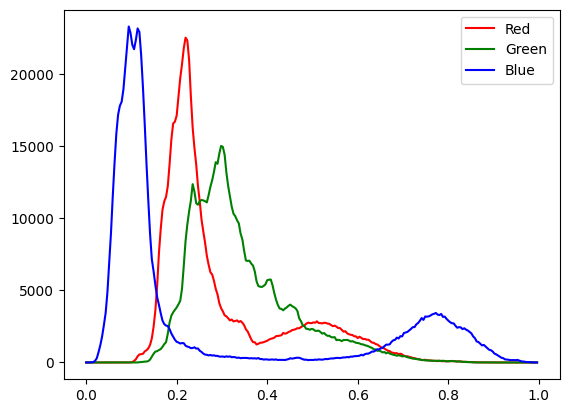

In [75]:
histograms = []
bin_edges = []
colors = ["r", "g", "b"]
for im in images[1:]:
    hist, bins = np.histogram(im.ravel(), bins=255, range=(0,1))
    histograms.append(hist)
    bin_edges.append(bins)

for hist, bins, name in zip(histograms, bin_edges, names[1:]):
    # For barred histograms
    # plt.bar(bins[:-1], hist, width=np.diff(bins), label=name, color=colors.pop(0))
    # For graph histograms
    plt.plot(bins[:-1], hist, label=name, color=colors.pop(0))
    plt.legend()

The blue histogram has two distinct and separate modes. Since the flower is blue, we assume the higher mode are pixels that make up the flower and will be the most suitable to segment. 

# 2 c)

Write a function that converts RGB-images to HSI space and repeat (a) for
the HSI-components.

# Solution

The equations for converting RGB $\to$ HSI are given as equations (6-16) $\to$ (6.19) in the book. They are as follows:

(6-16)
$$
H = \begin{cases}
\theta & \;\text{if}\; B\leq G\\
360-\theta & \;\text{if}\; B>G
\end{cases}
$$

(6-17)
$$
\theta = \cos^{-1} \left(  \frac{\frac{1}{2}\left[(R-G)+(R-B)\right]}{\left[(R-G)^2+(R-B)(G-B)\right]^{\frac{1}{2}}}  \right)
$$

(6-18)
$$
S = 1-\frac{3}{R+G+B}[\text{min}(R,G,B)]
$$

(6-19)
$$
I = \frac{1}{3}(R+G+B)
$$

In [76]:
# Numerical implementation

# function to convert rgb to hsi

def rgb_to_hsi(img):
    # Eq 6-17
    θ = np.arccos( 0.5*((R-G)+(R-B)) / (np.sqrt((R-G)**2 + (R-B)*(G-B)) + 1e-8) )
    θ *= 180/np.pi # Convert to degrees

    # Eq 6-16
    H = np.copy(θ)
    H[B > G] = 360 - θ[B > G]

    # Eq 6-18
    S = 1-3*np.min(img, axis=2)/np.sum(img, axis=2)

    # Eq 6-19
    I = np.mean(img, axis=2)
    
    return np.stack([H, S, I], axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..346.1019499852348].


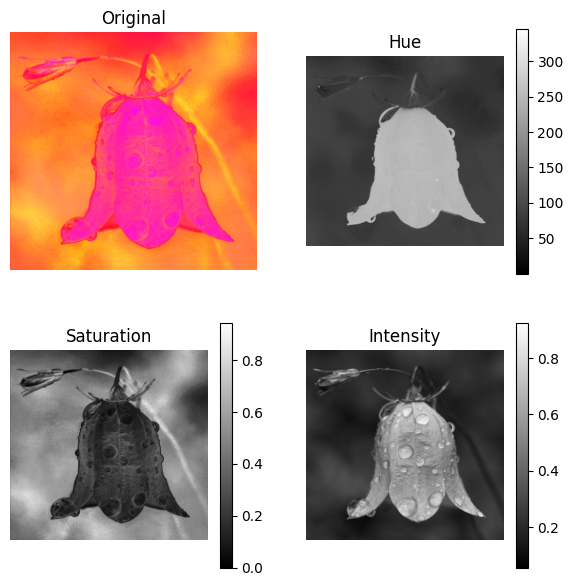

In [77]:
# Plot the HSI images
hsi_img = rgb_to_hsi(img)
H, S, I = hsi_img[:,:,0], hsi_img[:,:,1], hsi_img[:,:,2]
images = [hsi_img, H, S, I]
names = ["Original", "Hue", "Saturation", "Intensity"]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(7,7))
for ax, im, name in zip(axes.ravel(), images, names):
    ax.imshow(im, cmap="gray") if ax != axes[0,0] else ax.imshow(im)
    ax.set_title(name)
    ax.set_axis_off()
    
# Colorbars to h, s, i
for i, ax in enumerate(axes.ravel()[1:]):
    plt.colorbar(ax.imshow(images[0][:,:,i], cmap="gray"), ax=ax, orientation="vertical")
plt.show()

# 2 d)

Repeat b) for the HSI-components.

## Solution

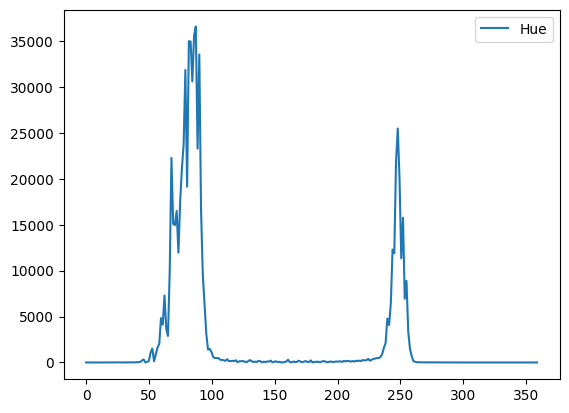

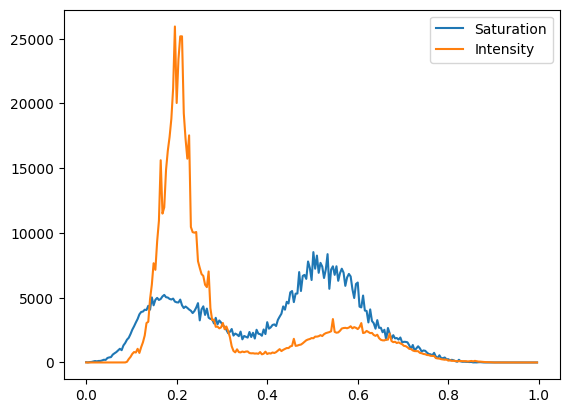

In [78]:
histograms =[]
bin_edges = []

#Hue
hist, bins = np.histogram(H.ravel(), bins=260, range=(0,360))
# plot hue
plt.plot(bins[:-1], hist, label="Hue")
plt.legend()
plt.show()

for im in images[2:]:
    hist, bins = np.histogram(im.ravel(), bins=255, range=(0,1))
    histograms.append(hist)
    bin_edges.append(bins)

for hist, bins, name in zip(histograms, bin_edges, names[2:]):
    # For barred histograms
    # plt.bar(bins[:-1], hist, width=np.diff(bins), label=name, color=colors.pop(0))
    # For graph histograms
    plt.plot(bins[:-1], hist, label=name)
    plt.legend()

The hue histogram has two distinct and very separate modes.  This is because the hue of the flower is very different from the rest of the background.  This makes the hue channel best for segmenting the flower from the background.